In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

In [7]:
csv = pd.read_csv("Sample-Sales-Data.csv", encoding="cp1252")

In [11]:
ed = pd.read_excel("Sample-Sales-Data.xlsx")

In [17]:
with open("customers.json", "r") as json_file:
    json_data = json.load(json_file)

In [19]:
csv.tail()

,ï»¿Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
385,2164,123,John,2012,"$88,885"
386,2193,456,Jane,2013,"$79,440"
387,2031,123,John,2011,"$65,644"
388,2130,456,Jane,2012,"$66,248"
389,2116,456,Jane,2013,"$3,196"


In [21]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ï»¿Postcode     390 non-null    int64 
 1   Sales_Rep_ID    390 non-null    int64 
 2   Sales_Rep_Name  390 non-null    object
 3   Year            390 non-null    int64 
 4   Value           390 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.4+ KB


In [23]:
csv.describe()

,ï»¿Postcode,Sales_Rep_ID,Year
count,390.000000,390.000000,390.000000
mean,2098.430769,456.000000,2012.000000
std,58.652206,272.242614,0.817545
min,2000.000000,123.000000,2011.000000
25%,2044.000000,123.000000,2011.000000
50%,2097.500000,456.000000,2012.000000
75%,2142.000000,789.000000,2013.000000
max,2206.000000,789.000000,2013.000000


In [25]:
csv.dropna()

,ï»¿Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,"$84,219"
1,2092,789,Ashish,2012,"$28,322"
2,2128,456,Jane,2013,"$81,879"
3,2073,123,John,2011,"$44,491"
4,2134,789,Ashish,2012,"$71,838"
...,...,...,...,...,...
385,2164,123,John,2012,"$88,885"
386,2193,456,Jane,2013,"$79,440"
387,2031,123,John,2011,"$65,644"
388,2130,456,Jane,2012,"$66,248"


In [27]:
csv.drop_duplicates()

,ï»¿Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,"$84,219"
1,2092,789,Ashish,2012,"$28,322"
2,2128,456,Jane,2013,"$81,879"
3,2073,123,John,2011,"$44,491"
4,2134,789,Ashish,2012,"$71,838"
...,...,...,...,...,...
385,2164,123,John,2012,"$88,885"
386,2193,456,Jane,2013,"$79,440"
387,2031,123,John,2011,"$65,644"
388,2130,456,Jane,2012,"$66,248"


In [29]:
ed.head()

,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
0,2121,456,Jane,2011,84219.497311
1,2092,789,Ashish,2012,28322.192268
2,2128,456,Jane,2013,81878.997241
3,2073,123,John,2011,44491.142121
4,2134,789,Ashish,2012,71837.720959


In [31]:
ed.tail()

,Postcode,Sales_Rep_ID,Sales_Rep_Name,Year,Value
385,2164,123,John,2012,88884.535217
386,2193,456,Jane,2013,79440.290813
387,2031,123,John,2011,65643.689454
388,2130,456,Jane,2012,66247.874869
389,2116,456,Jane,2013,3195.699054


In [33]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Postcode        390 non-null    int64  
 1   Sales_Rep_ID    390 non-null    int64  
 2   Sales_Rep_Name  390 non-null    object 
 3   Year            390 non-null    int64  
 4   Value           390 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.4+ KB


In [40]:
ed.describe()

,Postcode,Sales_Rep_ID,Year,Value
count,390.000000,390.000000,390.000000,390.000000
mean,2098.430769,456.000000,2012.000000,49229.388305
std,58.652206,272.242614,0.817545,28251.271309
min,2000.000000,123.000000,2011.000000,106.360599
25%,2044.000000,123.000000,2011.000000,26101.507357
50%,2097.500000,456.000000,2012.000000,47447.363750
75%,2142.000000,789.000000,2013.000000,72277.800608
max,2206.000000,789.000000,2013.000000,99878.489209


In [42]:
unified_data = pd.concat([csv, ed], ignore_index=True)

In [50]:
total_sales = unified_data['Sales_Rep_ID'].sum()
print("Total Sales:", total_sales)

Total Sales: 355680


In [62]:
print(unified_data.columns.tolist())


['ï»¿Postcode', 'Sales_Rep_ID', 'Sales_Rep_Name', 'Year', 'Value', 'Postcode']


In [64]:
unified_data.columns = unified_data.columns.str.strip().str.upper()
print(unified_data.columns)


Index(['Ï»¿POSTCODE', 'SALES_REP_ID', 'SALES_REP_NAME', 'YEAR', 'VALUE',
       'POSTCODE'],
      dtype='object')


In [68]:
unified_data.columns = unified_data.columns.str.strip().str.replace('ï»¿', '')
print(unified_data.columns)



Index(['Ï»¿POSTCODE', 'SALES_REP_ID', 'SALES_REP_NAME', 'YEAR', 'VALUE',
       'POSTCODE'],
      dtype='object')


In [74]:
category_counts = unified_data['SALES'].value_counts()
category_counts.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

KeyError: 'SALES'

In [76]:
# show exactly what pandas sees
print("columns:", unified_data.columns.tolist())
print("columns repr:", [repr(c) for c in unified_data.columns])

# confirm existence
print("'SALES' in cols ->", 'SALES' in unified_data.columns)
print("'Value' in cols ->", 'Value' in unified_data.columns)


columns: ['Ï»¿POSTCODE', 'SALES_REP_ID', 'SALES_REP_NAME', 'YEAR', 'VALUE', 'POSTCODE']
columns repr: ["'Ï»¿POSTCODE'", "'SALES_REP_ID'", "'SALES_REP_NAME'", "'YEAR'", "'VALUE'", "'POSTCODE'"]
'SALES' in cols -> False
'Value' in cols -> False


Cleaned columns: ['POSTCODE', 'SALES_REP_ID', 'SALES_REP_NAME', 'YEAR', 'SALES']
VALUE column missing.
Final columns: ['POSTCODE', 'SALES_REP_ID', 'SALES_REP_NAME', 'YEAR', 'SALES']


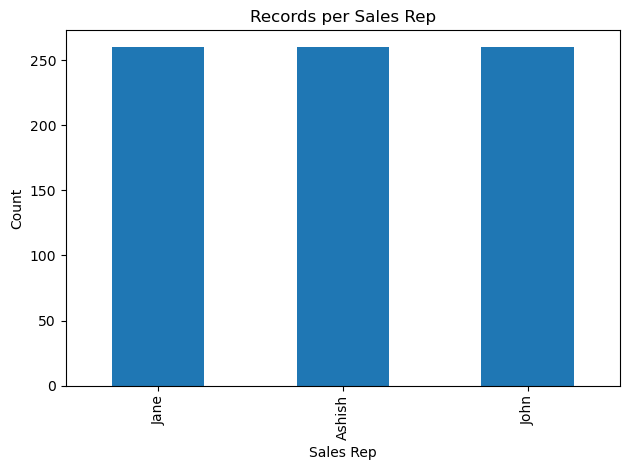

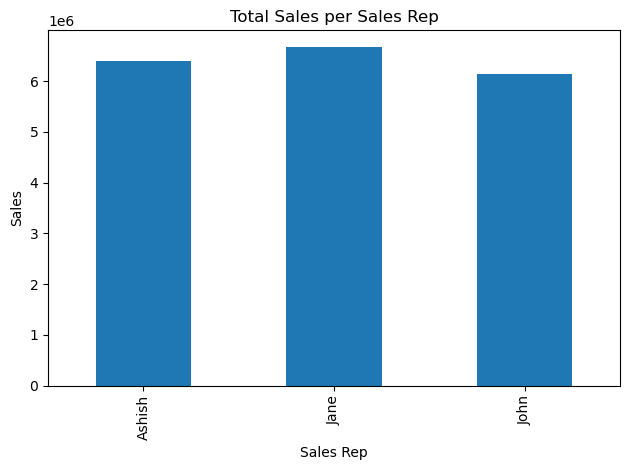

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Make sure dataframe is not a view
unified_data = unified_data.copy()

# ---------- 1) Clean column names ----------
unified_data.columns = (
    unified_data.columns
    .astype(str)
    .str.replace('\ufeff', '', regex=False)   # BOM
    .str.replace('ï»¿', '', regex=False)      # BOM bytes
    .str.replace('Ï»¿', '', regex=False)      # leftover BOM characters
    .str.strip()
)

# Remove duplicate columns
unified_data = unified_data.loc[:, ~unified_data.columns.duplicated()]

print("Cleaned columns:", unified_data.columns.tolist())

# ---------- 2) Convert VALUE to numeric ----------
if 'VALUE' in unified_data.columns:
    unified_data['VALUE'] = pd.to_numeric(unified_data['VALUE'], errors='coerce')
else:
    print("VALUE column missing.")

# ---------- 3) Rename VALUE → SALES ----------
unified_data = unified_data.rename(columns={'VALUE': 'SALES'})
print("Final columns:", unified_data.columns.tolist())

# ---------- 4) Plot counts per rep ----------
if 'SALES_REP_NAME' in unified_data.columns:
    unified_data['SALES_REP_NAME'].value_counts().plot(kind='bar')
    plt.title('Records per Sales Rep')
    plt.xlabel('Sales Rep')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# ---------- 5) Plot sales sum per rep ----------
if 'SALES' in unified_data.columns:
    sales_by_rep = unified_data.groupby('SALES_REP_NAME')['SALES'].sum()
    sales_by_rep.plot(kind='bar')
    plt.title('Total Sales per Sales Rep')
    plt.xlabel('Sales Rep')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()
